# Código correspondiente a la visualización de The Metropolitan Museum of Art Open Access

## PRA2: Visualización Efectiva

## Judith Urbina Córdoba

In [15]:
# análisis exploratorio
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/metobjects/MetObjects.csv
/kaggle/input/metobjectstxt/MetObjects.txt


In [17]:
# objeto que tenemos
file_path = '/kaggle/input/metobjectstxt/MetObjects.txt'

In [18]:
# Función para leer archivo txt

def read_txt_to_dataframe(file_path):
    # Intentar leer el archivo con diferentes delimitadores
    delimiters = [',', '\t', ';', '|', ' ']
    for delimiter in delimiters:
        try:
            df = pd.read_csv(file_path, delimiter=delimiter, dtype=str, low_memory=False)
            print(f"Archivo leído exitosamente con el delimitador '{delimiter}'")
            return df
        except pd.errors.ParserError:
            continue  # Intenta el siguiente delimitador si hay un error de parsing
        except Exception as e:
            print(f"Error al intentar leer con delimitador '{delimiter}': {e}")
            continue

    # Si no se pudo leer con delimitadores comunes, intentar sin delimitador (archivo plano)
    try:
        df = pd.read_fwf(file_path, dtype=str)
        print("Archivo leído exitosamente como archivo de ancho fijo (fixed-width).")
        return df
    except Exception as e:
        print(f"No se pudo leer el archivo {file_path}. Error: {e}")
        return None

In [19]:
# Uso con nuestros datos

df = read_txt_to_dataframe(file_path)
if df is not None:
    print("DataFrame creado exitosamente.")
else:
    print("No se pudo crear el DataFrame.")

Archivo leído exitosamente con el delimitador ','
DataFrame creado exitosamente.


In [20]:
df.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [21]:
dtypes = {
    'objectID': int,
    'isHighlight': bool,
    'accessionNumber': str,
    'accessionYear': str,
    'isPublicDomain': bool,
    'primaryImage': str,
    'primaryImageSmall': str,
    'additionalImages': object,
    'constituents': object,
    'department': str,
    'objectName': str,
    'title': str,
    'culture': str,
    'period': str,
    'dynasty': str,
    'reign': str,
    'portfolio': str,
    'artistRole': str,
    'artistPrefix': str,
    'artistDisplayName': str,
    'artistDisplayBio': str,
    'artistSuffix': str,
    'artistAlphaSort': str,
    'artistNationality': str,
    'artistBeginDate': str,
    'artistEndDate': str,
    'artistGender': str,
    'artistWikidata_URL': str,
    'artistULAN_URL': str,
    'objectDate': str,
    'objectBeginDate': int,
    'objectEndDate': int,
    'medium': str,
    'dimensions': str,
    'measurements': object,
    'creditLine': str,
    'geographyType': str,
    'city': str,
    'state': str,
    'county': str,
    'country': str,
    'region': str,
    'subregion': str,
    'locale': str,
    'locus': str,
    'excavation': str,
    'river': str,
    'classification': str,
    'rightsAndReproduction': str,
    'linkResource': str,
    'repository': str,
    'objectURL': str,
    'tags': object,
    'objectWikidata_URL': str,
    'isTimelineWork': bool,
    'GalleryNumber': str
}

In [22]:
# df -> DataFrame cargado
# dtypes -> Types correctos

In [23]:
# Función para comparar y corregir tipos de datos
def compare_and_correct_dtypes(df, dtypes):
    # Lista para almacenar las diferencias
    differences = []

    for column in df.columns:
        if column in dtypes:
            # Obtener el tipo real del DataFrame y el tipo esperado del diccionario
            actual_type = df[column].dtype
            expected_type = dtypes[column]

            # Convertir expected_type a tipo de pandas
            if expected_type == int:
                expected_type_pd = 'int64'
            elif expected_type == bool:
                expected_type_pd = 'bool'
            elif expected_type == str:
                expected_type_pd = 'object'
            elif expected_type == object:
                expected_type_pd = 'object'

            # Comparar tipos y corregir si es necesario
            if actual_type != expected_type_pd:
                differences.append({
                    'Field': column,
                    'Actual Type': actual_type,
                    'Expected Type': expected_type_pd,
                    'Sample Data': df[column].head(5).tolist()  # Ejemplo de las primeras 5 filas
                })
                # Intentar convertir la columna al tipo esperado
                try:
                    df[column] = df[column].astype(expected_type)
                    print(f"Columna '{column}' convertida a {expected_type_pd}")
                except Exception as e:
                    print(f"No se pudo convertir la columna '{column}' a {expected_type_pd}. Error: {e}")
        else:
            # Si la columna no está en dtypes, también se considera una diferencia
            differences.append({
                'Field': column,
                'Actual Type': df[column].dtype,
                'Expected Type': None,
                'Sample Data': df[column].head(5).tolist()  # Ejemplo de las primeras 5 filas
            })

    # Convertir la lista de diferencias a un DataFrame
    differences_df = pd.DataFrame(differences)
    return df, differences_df

# Uso de la función para comparar y corregir los tipos del DataFrame con el diccionario dtypes
df_corrected, differences_df = compare_and_correct_dtypes(df, dtypes)

In [24]:
df_corrected.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


Análisis entre culturas

In [25]:
df_corrected.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL'],
      dtype='object')

In [26]:
df_corrected[['Culture','Period', 'Dynasty', 'Reign']]
# no podemos analizar con cultura ni periodo ni dinastía ni reinado

,Culture,Period,Dynasty,Reign
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
484951,NaN,NaN,NaN,NaN
484952,NaN,NaN,NaN,NaN
484953,NaN,NaN,NaN,NaN
484954,NaN,NaN,NaN,NaN


Cuestiones de género

In [27]:
df_corrected[['Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL']]
# no podemos mirar el género directamente

,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL
0,Maker,,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,https://www.wikidata.org/wiki/Q3806459
1,Maker,,Christian Gobrecht,1785–1844,,"Gobrecht, Christian",American,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,https://www.wikidata.org/wiki/Q5109648
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
484951,Artist,,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...",,"Gorsline, Douglas",American,1913,1985,NaN,NaN,NaN
484952,Artist,,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...",,"Gorsline, Douglas",American,1913,1985,NaN,NaN,NaN
484953,Artist,,Edmond Mario Granville,"American, Chicago 1905–1969",,"Granville, Edmond Mario",American,1905,1969,NaN,NaN,NaN
484954,Author,,Michel Eugène Chevreul,1786-1889,,"Chevreul, Michel Eugène",,1786,1889,NaN,(not assigned),https://www.wikidata.org/wiki/Q271651


Cuestiones de highlight

In [28]:
highlights = df_corrected.groupby('Is Highlight').count()

In [29]:
highlight = df_corrected.loc[df_corrected['Is Highlight']=='True']
n_highlights = highlight.shape[0]
total = df_corrected.shape[0]
print('proporción: ', n_highlights/total)
n_highlights, total
# independientemente si conocemos o no el artista

proporción:  0.0057262926945949736


(2777, 484956)

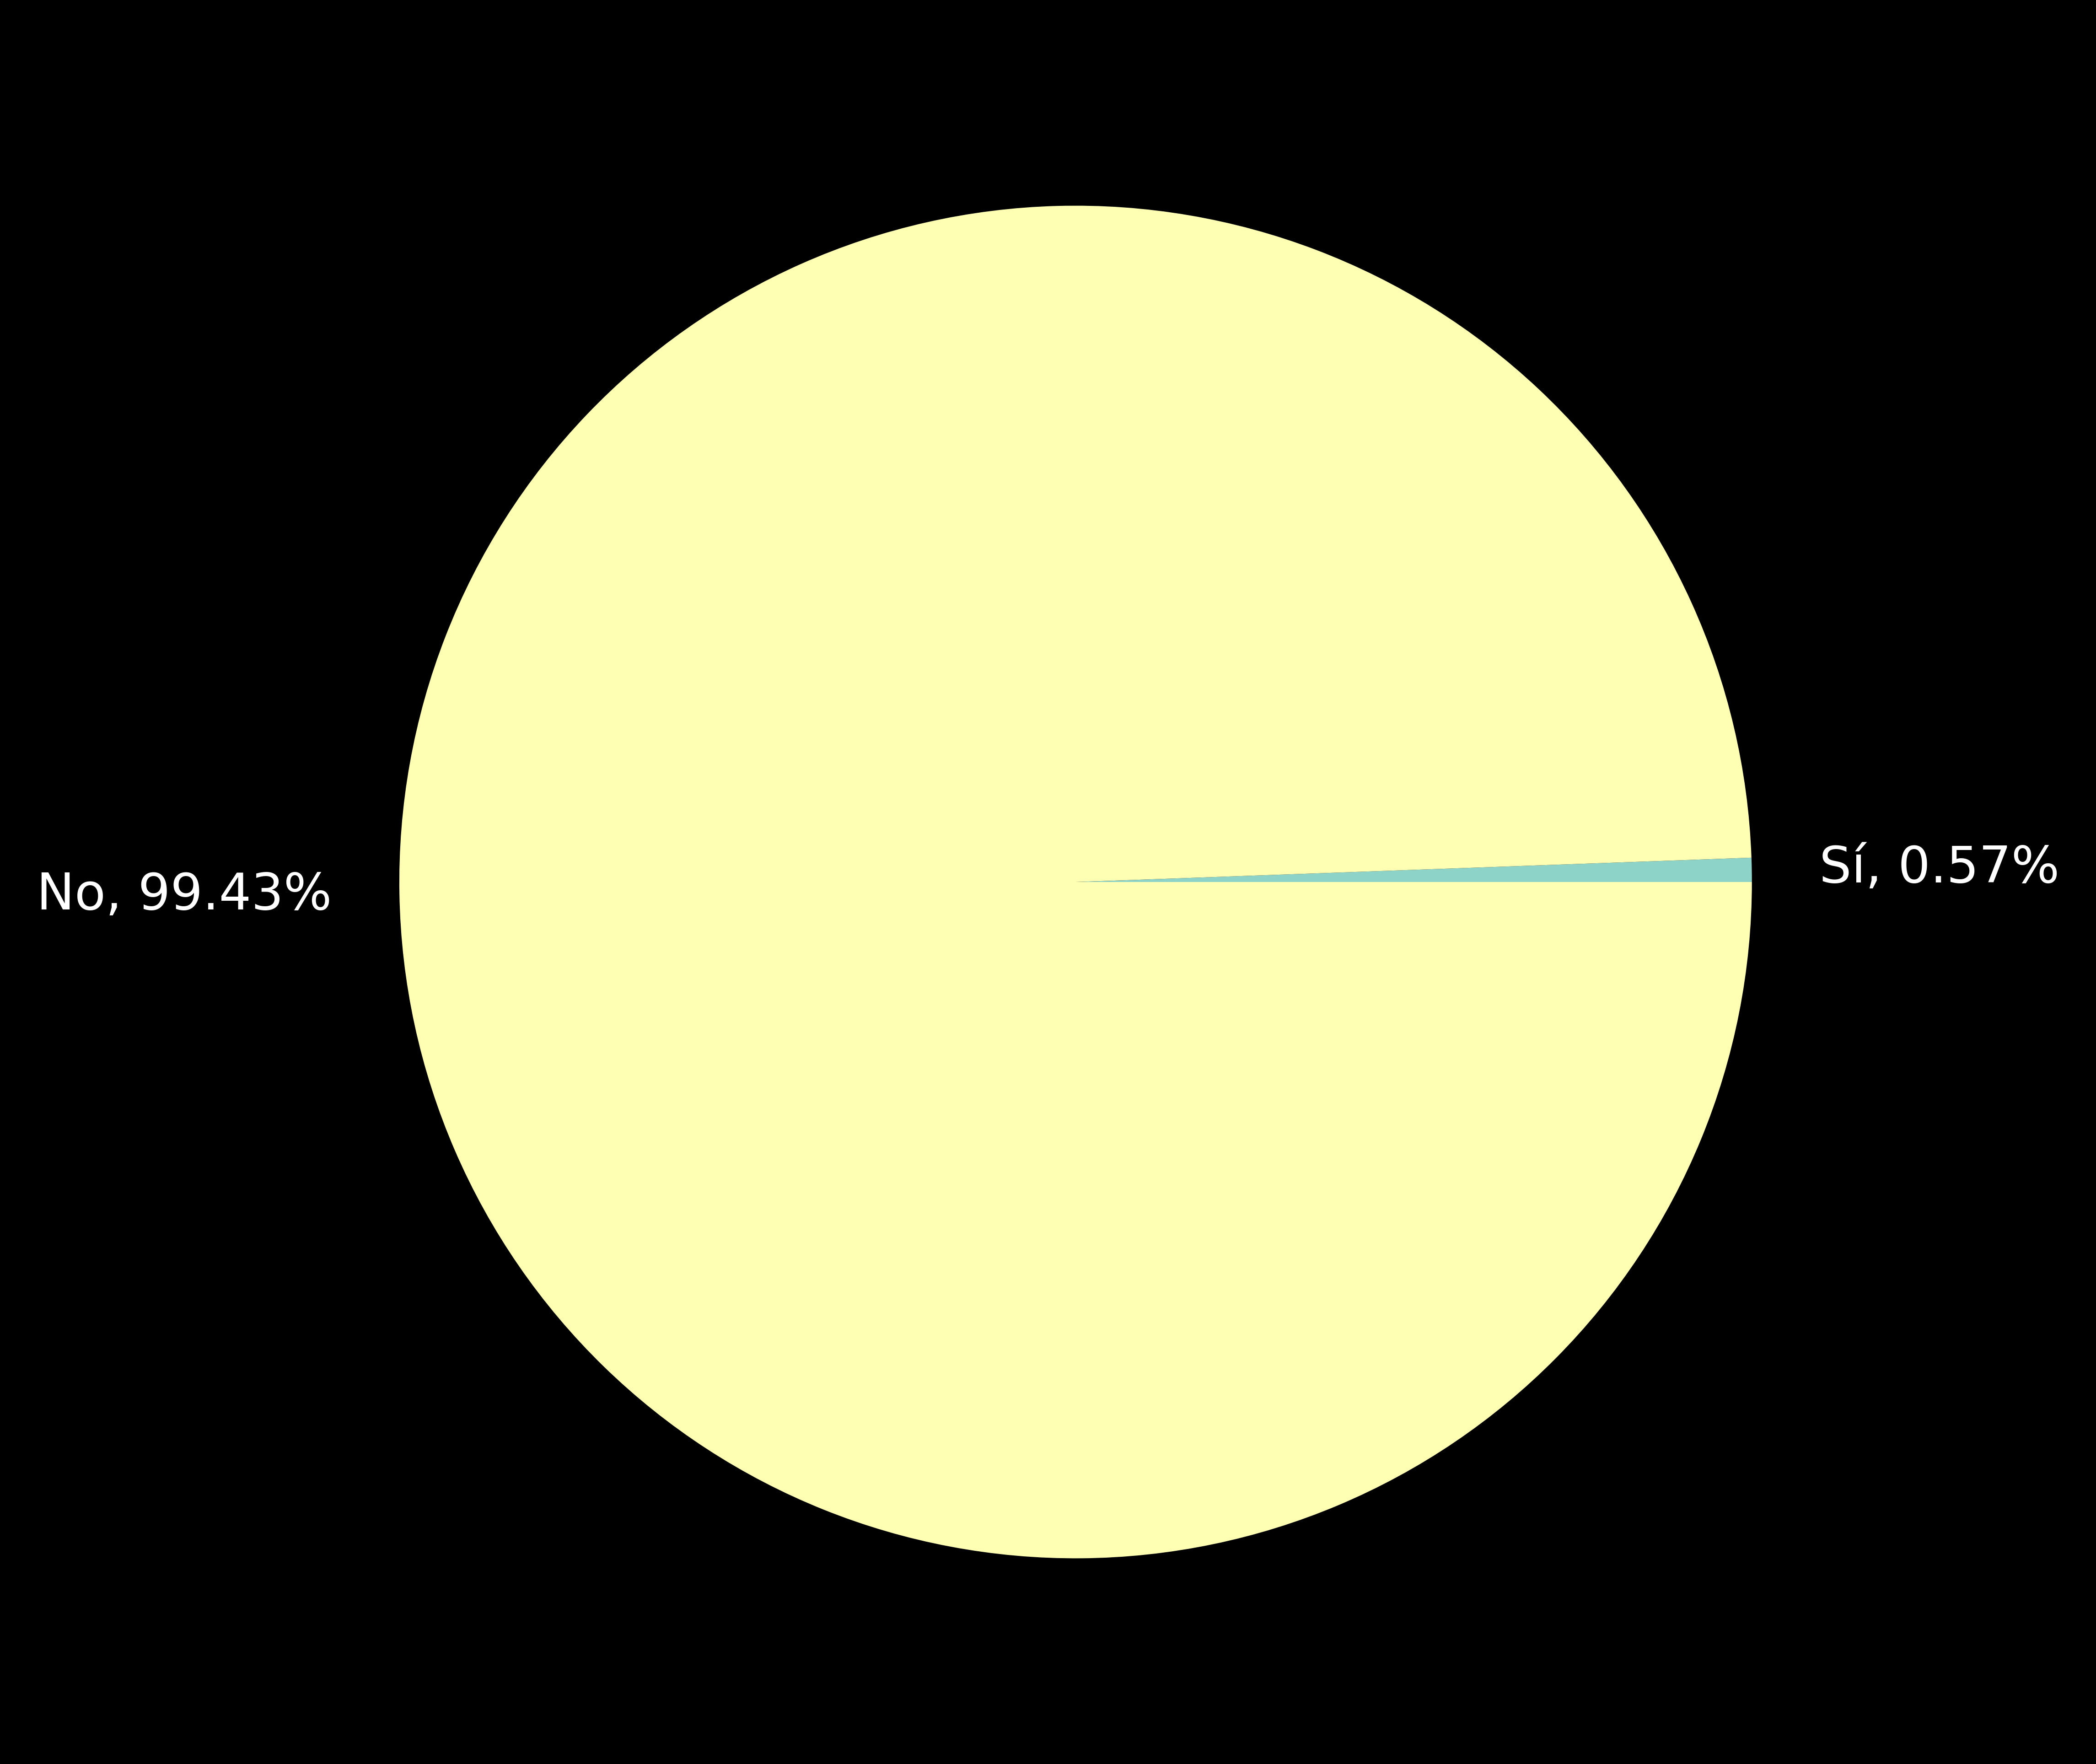

In [73]:

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=800)
size = [n_highlights, total-n_highlights]

# circ = plt.Circle((0,0), radius=3)
plt.pie(size, labels = ['Sí, 0.57%', 'No, 99.43%'])
# pie_c=plt.gcf()
# pie_c.gca().add_artist(circ)
plt.savefig('known_highlight.png')
plt.show()

Análisis artistas

In [30]:
df_corrected['Artist Role'].value_counts()

Artist Role
Artist                                                                 116556
Publisher                                                               31319
Artist|Artist                                                           12078
Artist|Publisher                                                        11530
Designer                                                                10807
                                                                        ...  
Author|Printer|Artist and engraver|Publisher                                1
Author|Engraver|Artist|Engraver|Artist|Publisher                            1
Author|Translator|Publisher|Publisher|Illustrator|Printer                   1
Author|Engraver|Publisher|Artist|Publisher|Printer|Binder|Publisher         1
Sitter|Dedicatee|Lithographer|Artist                                        1
Name: count, Length: 7118, dtype: int64

In [31]:
# analizamos cómo se ven dos casos concretos
df_corrected.loc[0,:]

Object Number                                                     1979.486.1
Is Highlight                                                           False
Is Timeline Work                                                       False
Is Public Domain                                                       False
Object ID                                                                  1
Gallery Number                                                           NaN
Department                                                 The American Wing
AccessionYear                                                           1979
Object Name                                                             Coin
Title                                           One-dollar Liberty Head Coin
Culture                                                                  NaN
Period                                                                   NaN
Dynasty                                                                  NaN

In [32]:
df_corrected.loc[5,:]

Object Number                                                     67.265.12
Is Highlight                                                          False
Is Timeline Work                                                      False
Is Public Domain                                                      False
Object ID                                                                 6
Gallery Number                                                          NaN
Department                                                The American Wing
AccessionYear                                                          1967
Object Name                                                            Coin
Title                                            Two-and-a-Half Dollar Coin
Culture                                                                 NaN
Period                                                                  NaN
Dynasty                                                                 NaN
Reign       

In [33]:
# limpiamos los datos
role=df_corrected[~df_corrected['Artist Role'].isna()]
role.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282513 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Object Number            282513 non-null  object
 1   Is Highlight             282513 non-null  object
 2   Is Timeline Work         282513 non-null  object
 3   Is Public Domain         282513 non-null  object
 4   Object ID                282513 non-null  object
 5   Gallery Number           12091 non-null   object
 6   Department               282513 non-null  object
 7   AccessionYear            280390 non-null  object
 8   Object Name              280435 non-null  object
 9   Title                    277197 non-null  object
 10  Culture                  58820 non-null   object
 11  Period                   10947 non-null   object
 12  Dynasty                  453 non-null     object
 13  Reign                    403 non-null     object
 14  Portfolio                

In [34]:
# conocemos este porcentaje de las obras
role.shape[0]/df_corrected.shape[0]

0.582553881176849

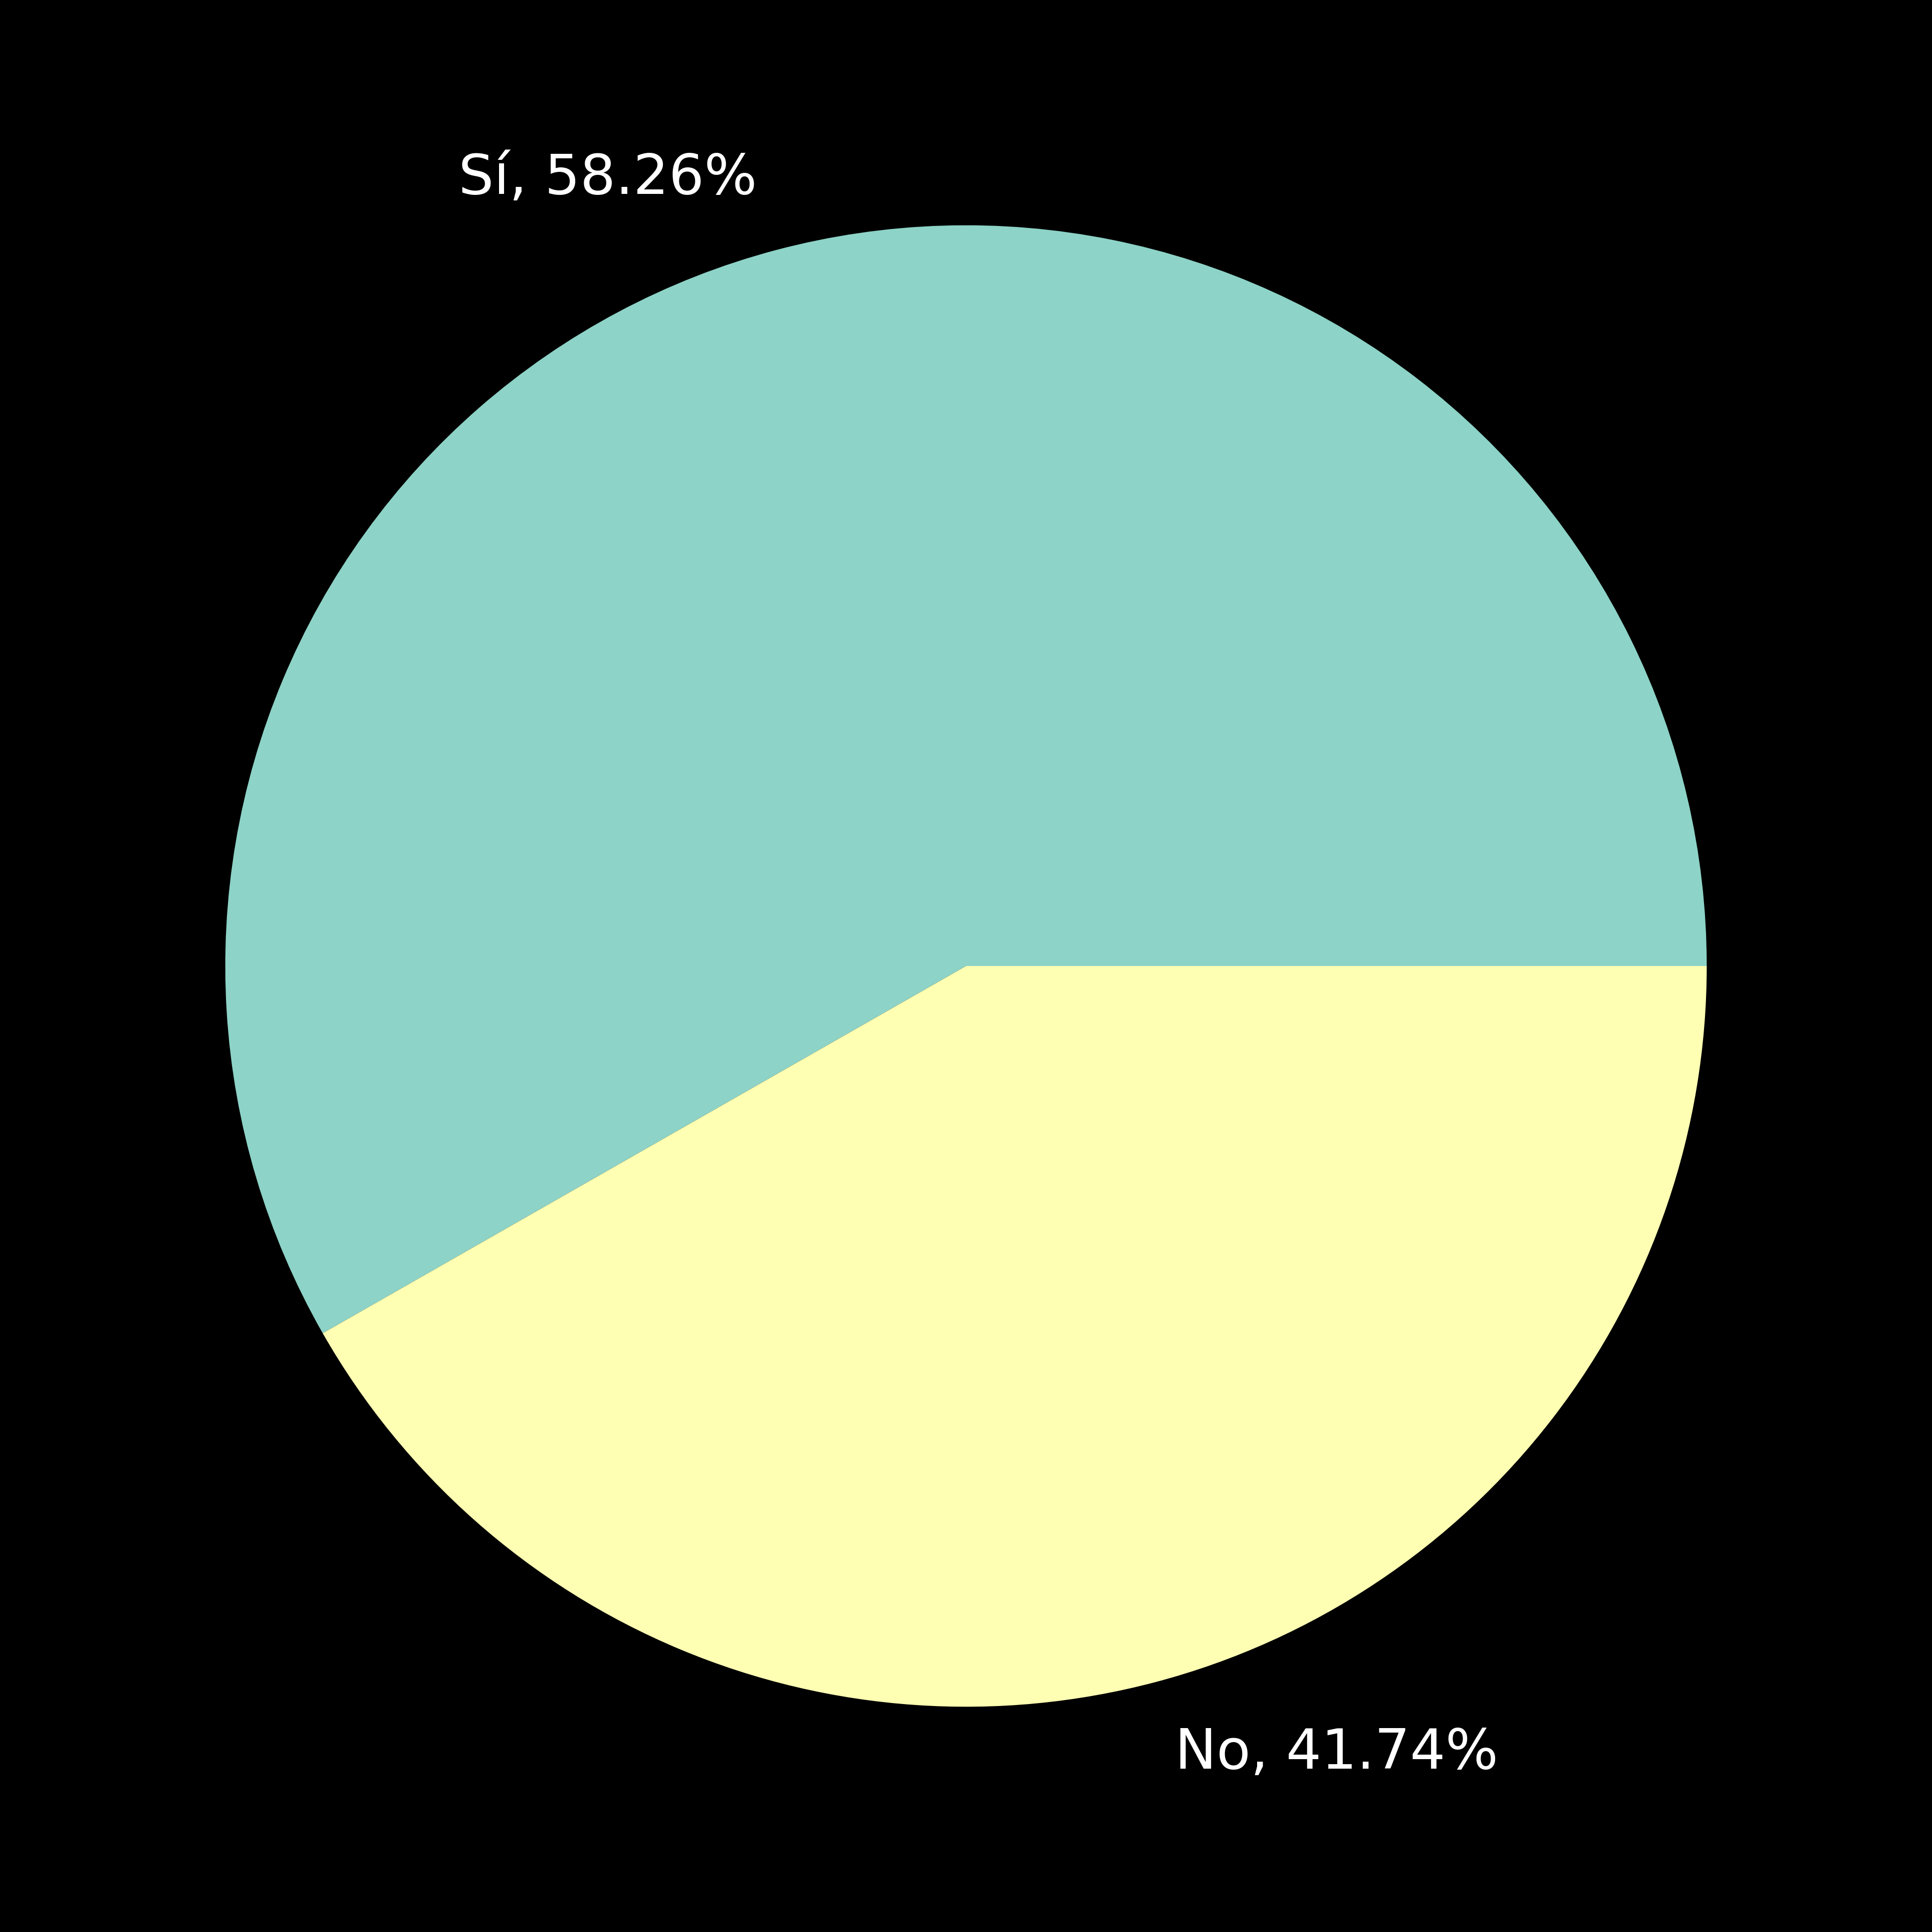

In [65]:
# hacemos un pie chart que lo enseñe
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=800)
size = [role.shape[0], df_corrected.shape[0]- role.shape[0] ]
plt.pie(size, labels = ['Sí, 58.26%', 'No, 41.74%'], )
plt.savefig('known_role.png')
plt.show()

In [35]:
import re
# Crear una nueva lista con los strings que empiezan por "artista"
lista_artistas = [s for s in df_corrected.columns if s.startswith('Artist')]
print(lista_artistas)

['Artist Role', 'Artist Prefix', 'Artist Display Name', 'Artist Display Bio', 'Artist Suffix', 'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date', 'Artist End Date', 'Artist Gender', 'Artist ULAN URL', 'Artist Wikidata URL']


In [ ]:
# representamos la lista en un wordcloud gigante

In [42]:
# obtenemos este dataframe con artistas conocidos
role[lista_artistas]

,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL
0,Maker,,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,https://www.wikidata.org/wiki/Q3806459
1,Maker,,Christian Gobrecht,1785–1844,,"Gobrecht, Christian",American,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,https://www.wikidata.org/wiki/Q5109648
9,Maker,,Bela Lyon Pratt,1867–1917,,"Pratt, Bela Lyon",American,1867,1917,NaN,http://vocab.getty.edu/page/ulan/500095555,https://www.wikidata.org/wiki/Q4881787
10,Maker,,Christian Gobrecht,1785–1844,,"Gobrecht, Christian",American,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,https://www.wikidata.org/wiki/Q5109648
11,Maker,,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,https://www.wikidata.org/wiki/Q3806459
...,...,...,...,...,...,...,...,...,...,...,...,...
484951,Artist,,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...",,"Gorsline, Douglas",American,1913,1985,NaN,NaN,NaN
484952,Artist,,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...",,"Gorsline, Douglas",American,1913,1985,NaN,NaN,NaN
484953,Artist,,Edmond Mario Granville,"American, Chicago 1905–1969",,"Granville, Edmond Mario",American,1905,1969,NaN,NaN,NaN
484954,Author,,Michel Eugène Chevreul,1786-1889,,"Chevreul, Michel Eugène",,1786,1889,NaN,(not assigned),https://www.wikidata.org/wiki/Q271651


In [43]:
roles_lista = []
for i in artists['Artist Role']:
    rolesss = list(map(str.split, i.split("|")))
    lista = list(set([i[0] for i in rolesss]))
    roles_lista.append(lista)

In [49]:
lista = list(set([i[0] for i in roles_lista]))
rol_del_artista = [i[0] for i in roles_lista]
size_groups = [rol_del_artista.count(j) for j in lista]

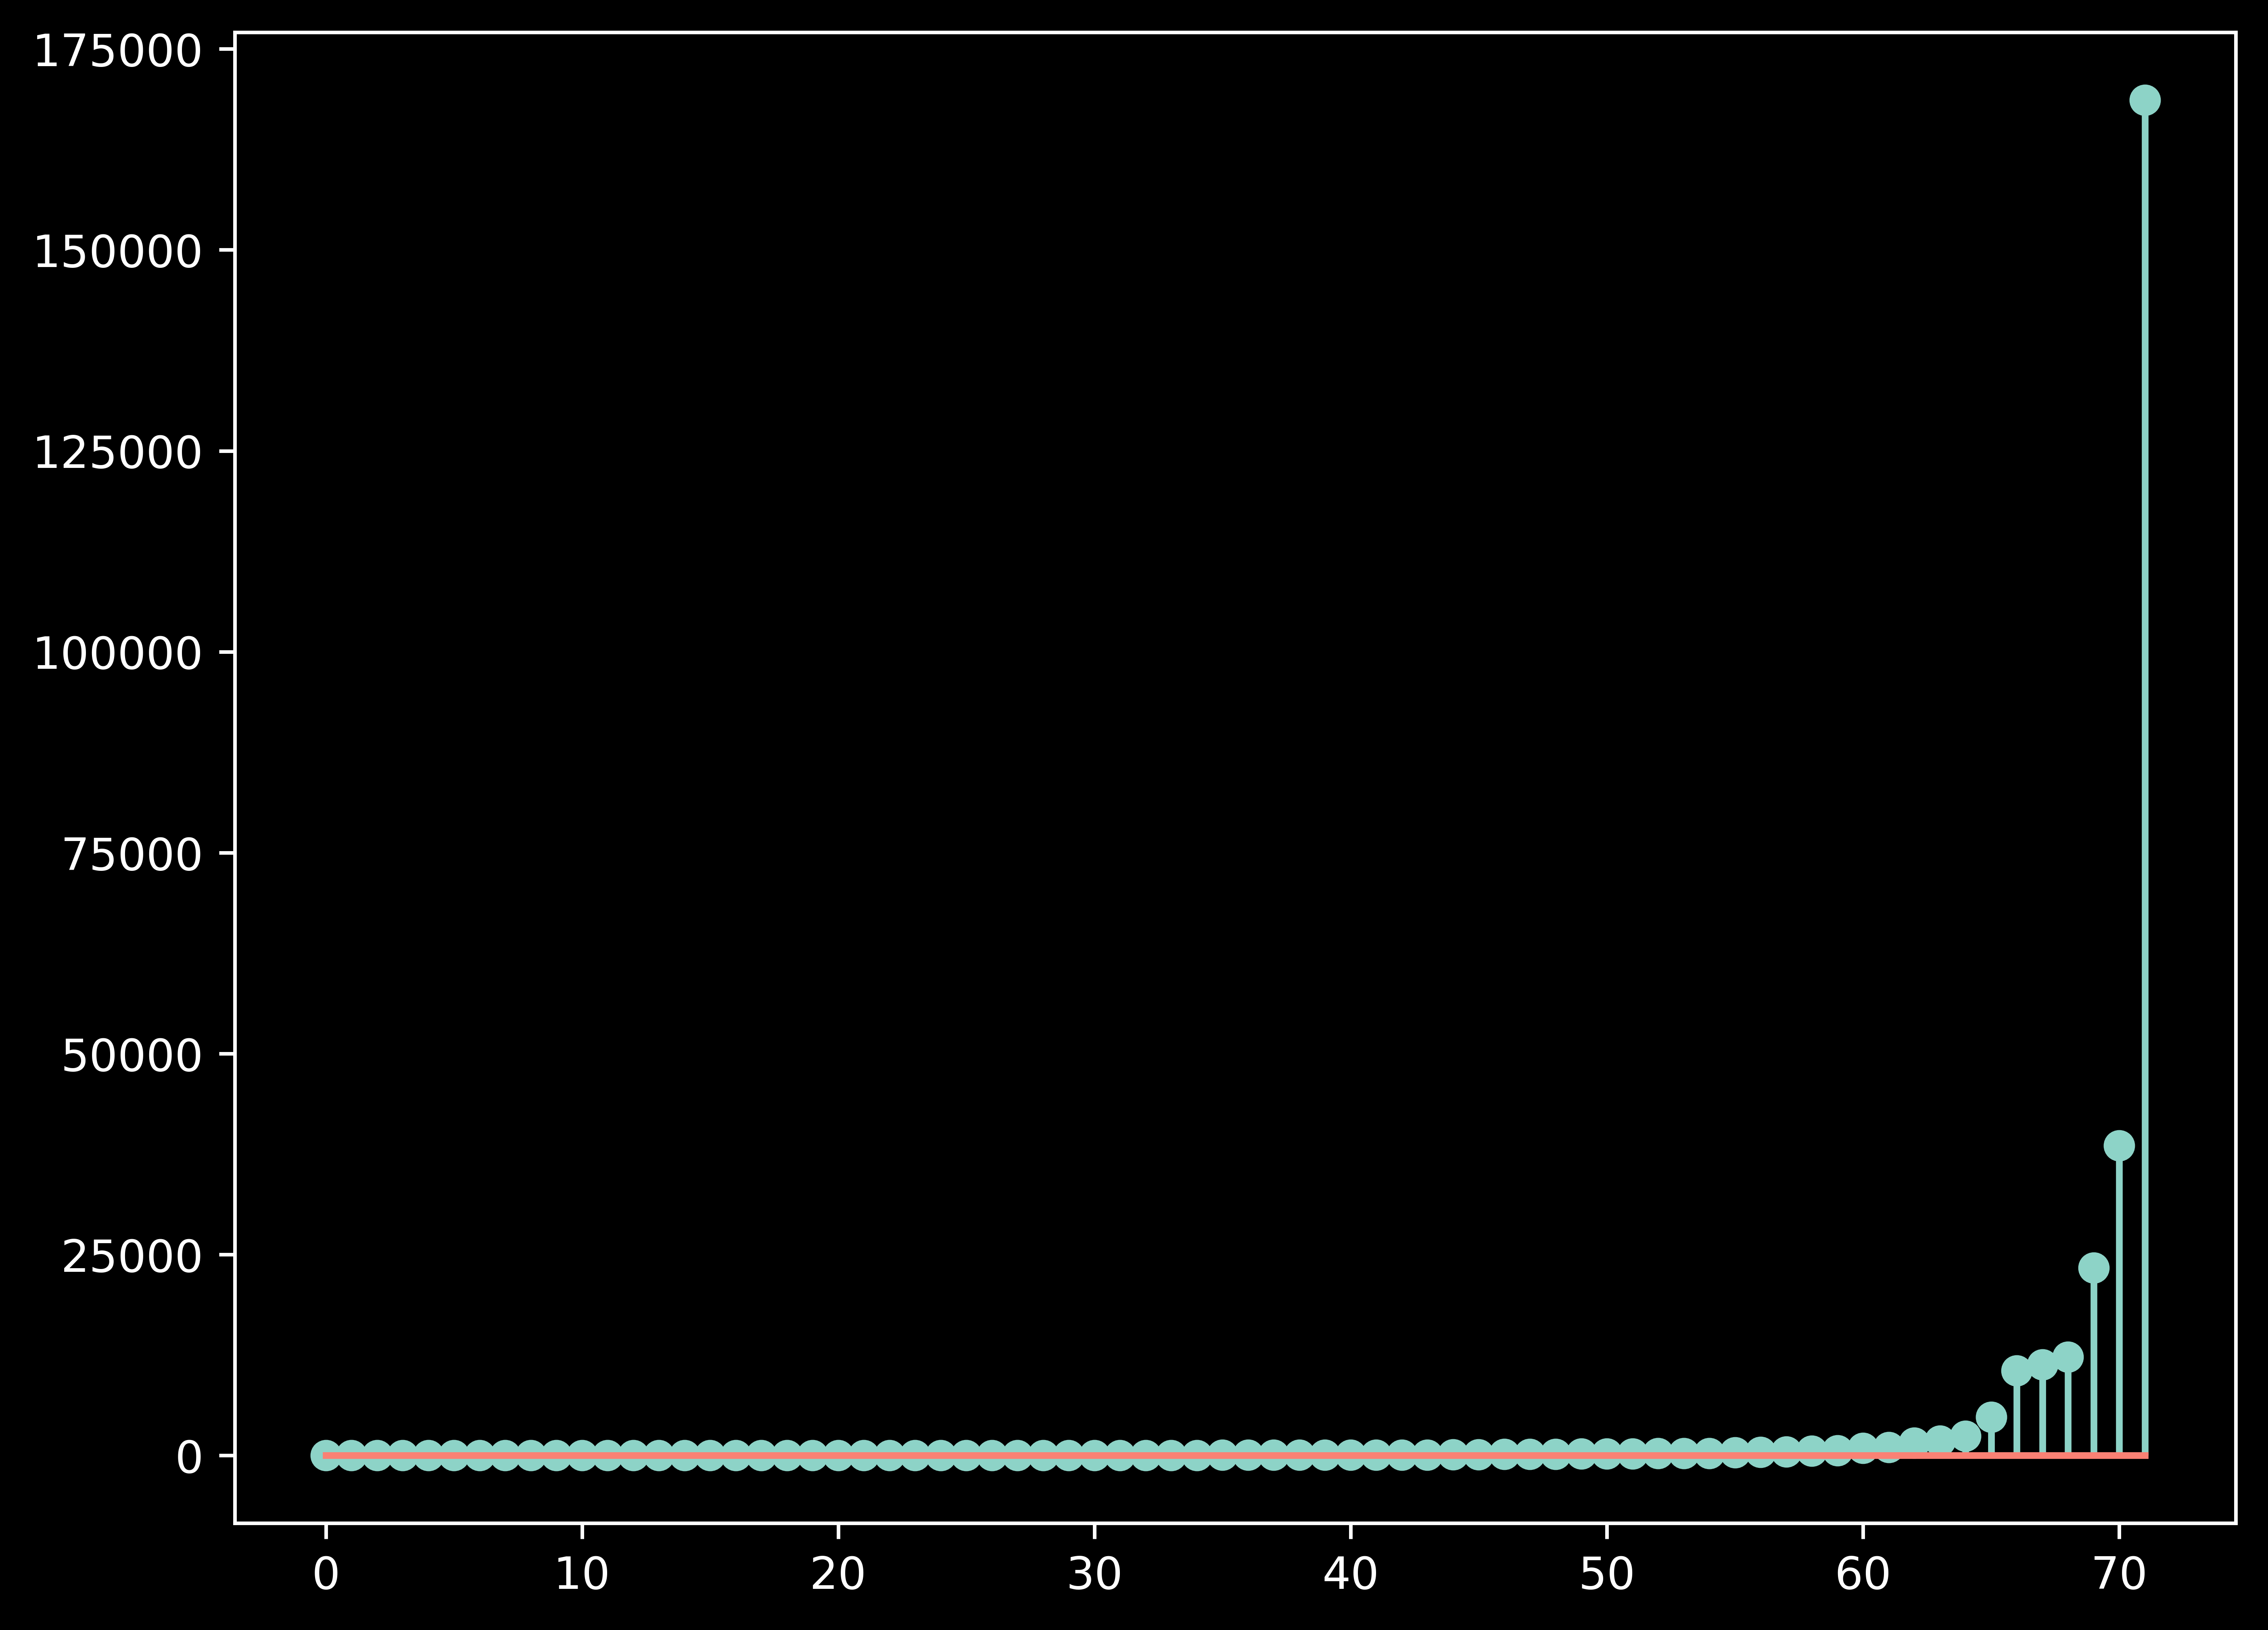

In [74]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=800)
lollipop = pd.DataFrame({
    'group' : lista,
    'values':size_groups
})
lollipop_ordered=lollipop.sort_values(by='values')
rango = range(1,len(lollipop.index)+1)
plt.stem(lollipop_ordered['values'])
# plt.xticks(rango, lollipop_ordered['group'], rotation=45)
plt.savefig('rol_artista.png')
plt.show()

Por recomendación en internet lo ideal es 800 dpi para 1080 de resolución

https://steelseries.com/blog/best-dpi-for-gaming-settings-equipment-1093#:~:text=The%20short%20answer%20is%20to,setting%20between%20800%20and%202400.

Análisis roles de los artistas

In [75]:
# aquí la lista de nombres
lista

['Author',
 'Entrepreneur',
 'Couture',
 'Department',
 'Gunsmith',
 'Lock',
 'Former',
 'Patron',
 'Draftsman',
 'Design',
 'Stock',
 'Artist',
 'Sword',
 'Binder',
 'Source',
 'Dedicatee',
 'Retailer',
 'Printmaker',
 'Lithographer',
 'Poet',
 'Inlayer',
 'Inventor',
 'Architect',
 'Workshop',
 'Illustrator',
 'Photographer',
 'Gun',
 'Purveyor',
 'Engraver',
 'Photo',
 'Modeler',
 'Hilt',
 'Founder',
 'Typographer',
 'Illuminator',
 'Papermaker',
 'Silversmith',
 'Barrelsmith',
 'Editor',
 'Collaborator',
 'Collector',
 'Swordsmith',
 'Subject',
 'Enameler',
 'Maker',
 'Decorator',
 'Photography',
 'Patentee',
 'Printer',
 'Manufacturer',
 'Secondary',
 'Publisher',
 'Fittings',
 'Person',
 'Goldsmith',
 'Calligrapher',
 'Sitter',
 'Mount',
 'Armorer',
 'Translator',
 'Correspondent',
 'Steel-chiseler',
 'Etcher',
 'Restorer/Conservator',
 'Factory',
 'Damascener',
 'Block',
 'Designer',
 'Culture',
 'Manufactory',
 'Blacksmith',
 'Bladesmith']

A partir de la web gratuita Wordclouds hemos creado un wordcloud con los roles que aparecen en las obras del The Met.

https://www.wordclouds.com/ 

Coincidencias en tiempo?

In [22]:
df_corrected[['Object Number', 'Is Highlight','Object ID', 'Gallery Number', 'Department',
       'Object Name', 'Title']]

,Object Number,Is Highlight,Object ID,Gallery Number,Department,Object Name,Title
0,1979.486.1,False,1,NaN,The American Wing,Coin,One-dollar Liberty Head Coin
1,1980.264.5,False,2,NaN,The American Wing,Coin,Ten-dollar Liberty Head Coin
2,67.265.9,False,3,NaN,The American Wing,Coin,Two-and-a-Half Dollar Coin
3,67.265.10,False,4,NaN,The American Wing,Coin,Two-and-a-Half Dollar Coin
4,67.265.11,False,5,NaN,The American Wing,Coin,Two-and-a-Half Dollar Coin
...,...,...,...,...,...,...,...
484951,55.621.134,False,900605,NaN,Drawings and Prints,Print,Holiday Card
484952,1977.646,False,900606,NaN,Drawings and Prints,Print,Brooklyn Local
484953,33.40.1,False,900633,NaN,Drawings and Prints,Print,Yesterday and Today
484954,170.1 C42,True,900717,NaN,The Libraries,NaN,"De la loi du contraste simultané des couleurs,..."


In [25]:
df_corrected.groupby(['Title']).head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484950,54.646.1,False,False,False,900602,NaN,Drawings and Prints,1954,Print,Behind the Scenes,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
484952,1977.646,False,False,False,900606,NaN,Drawings and Prints,1977,Print,Brooklyn Local,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
484953,33.40.1,False,False,False,900633,NaN,Drawings and Prints,1933,Print,Yesterday and Today,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
484954,170.1 C42,True,False,False,900717,NaN,The Libraries,NaN,NaN,"De la loi du contraste simultané des couleurs,...",...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [ ]:
df_corrected[['Is']]

In [13]:
dtypes = {
    'objectID': int,
    'isHighlight': bool,
    'accessionNumber': str,
    'accessionYear': str,
    'isPublicDomain': bool,
    'primaryImage': str,
    'primaryImageSmall': str,
    'additionalImages': object,
    'constituents': object,
    'department': str,
    'objectName': str,
    'title': str,
    'culture': str,
    'period': str,
    'dynasty': str,
    'reign': str,
    'portfolio': str,
    'artistRole': str,
    'artistPrefix': str,
    'artistDisplayName': str,
    'artistDisplayBio': str,
    'artistSuffix': str,
    'artistAlphaSort': str,
    'artistNationality': str,
    'artistBeginDate': str,
    'artistEndDate': str,
    'artistGender': str,
    'artistWikidata_URL': str,
    'artistULAN_URL': str,
    'objectDate': str,
    'objectBeginDate': int,
    'objectEndDate': int,
    'medium': str,
    'dimensions': str,
    'measurements': object,
    'creditLine': str,
    'geographyType': str,
    'city': str,
    'state': str,
    'county': str,
    'country': str,
    'region': str,
    'subregion': str,
    'locale': str,
    'locus': str,
    'excavation': str,
    'river': str,
    'classification': str,
    'rightsAndReproduction': str,
    'linkResource': str,
    'repository': str,
    'objectURL': str,
    'tags': object,
    'objectWikidata_URL': str,
    'isTimelineWork': bool,
    'GalleryNumber': str
}

In [15]:
ds = pd.read_csv('/kaggle/input/metobjects/MetObjects.csv', dtype=dtypes)
ds.head()

/tmp/ipykernel_33/2654405765.py:1: DtypeWarning: Columns (5,7,10,11,12,13,14,22,34,35,36,37,38,39,40,41,42,43,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv('/kaggle/input/metobjects/MetObjects.csv', dtype=dtypes)


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [16]:
ds.dtypes

Object Number               object
Is Highlight                  bool
Is Timeline Work              bool
Is Public Domain              bool
Object ID                    int64
Gallery Number              object
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Constiuent ID               object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date         

In [6]:
# indicamos los tipos para que el pandas entienda qué tipo de variable tendría
# que ser cada uno
df = pd.read_csv('/kaggle/input/metobjectstxt/MetObjects.txt')
df.head()

/tmp/ipykernel_33/575989300.py:1: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/metobjectstxt/MetObjects.txt')


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [7]:
df.dtypes

Object Number               object
Is Highlight                  bool
Is Timeline Work              bool
Is Public Domain              bool
Object ID                    int64
Gallery Number              object
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Constituent ID              object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date         

In [10]:
df.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

In [23]:
df['Locus'].count(), for col in df.columns:
    print(df[col].count()/len(df))

7518

In [30]:
# nos interesan
# columnas con índices
col_idx = [18, 22, 25]
df.iloc[:, [18,22,25]]

,Artist Display Name,Artist Nationality,Artist Gender
0,James Barton Longacre,American,NaN
1,Christian Gobrecht,American,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
484951,Douglas Gorsline,American,NaN
484952,Douglas Gorsline,American,NaN
484953,Edmond Mario Granville,American,NaN
484954,Michel Eugène Chevreul,,NaN


In [31]:
# hay muchos NaN en género así que descartado
# relacionado con los artistas:
df.iloc[:, 16:27]

,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL
0,Maker,,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409
1,Maker,,Christian Gobrecht,1785–1844,,"Gobrecht, Christian",American,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
484951,Artist,,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...",,"Gorsline, Douglas",American,1913,1985,NaN,NaN
484952,Artist,,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...",,"Gorsline, Douglas",American,1913,1985,NaN,NaN
484953,Artist,,Edmond Mario Granville,"American, Chicago 1905–1969",,"Granville, Edmond Mario",American,1905,1969,NaN,NaN
484954,Author,,Michel Eugène Chevreul,1786-1889,,"Chevreul, Michel Eugène",,1786,1889,NaN,(not assigned)


In [38]:
# cogemos los artist role, artist display name, display bio, american
# artist begin date y end date que no tengan NaN
dfartist = df.iloc[:, [16, 18, 19, 21,22,23,24]]
dfartist= dfartist.dropna(axis=0)
dfartist

,Artist Role,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date
0,Maker,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...","Longacre, James Barton",American,1794,1869
1,Maker,Christian Gobrecht,1785–1844,"Gobrecht, Christian",American,1785,1844
9,Maker,Bela Lyon Pratt,1867–1917,"Pratt, Bela Lyon",American,1867,1917
10,Maker,Christian Gobrecht,1785–1844,"Gobrecht, Christian",American,1785,1844
11,Maker,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...","Longacre, James Barton",American,1794,1869
...,...,...,...,...,...,...,...
484951,Artist,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...","Gorsline, Douglas",American,1913,1985
484952,Artist,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...","Gorsline, Douglas",American,1913,1985
484953,Artist,Edmond Mario Granville,"American, Chicago 1905–1969","Granville, Edmond Mario",American,1905,1969
484954,Author,Michel Eugène Chevreul,1786-1889,"Chevreul, Michel Eugène",,1786,1889


In [39]:
# hemos pasado de 484956 a 280423 filas
dfartist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280423 entries, 0 to 484955
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Artist Role          280423 non-null  object
 1   Artist Display Name  280423 non-null  object
 2   Artist Display Bio   280423 non-null  object
 3   Artist Alpha Sort    280423 non-null  object
 4   Artist Nationality   280423 non-null  object
 5   Artist Begin Date    280423 non-null  object
 6   Artist End Date      280423 non-null  object
dtypes: object(7)
memory usage: 17.1+ MB


In [46]:
dfartist.columns

Index(['Artist Role', 'Artist Display Name', 'Artist Display Bio',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date'],
      dtype='object')

In [56]:
# convertimos a string todo
dfartist = dfartist.astype(
    {'Artist Role': str ,
     'Artist Display Name':str,
     'Artist Display Bio':str,
    'Artist Alpha Sort':str,
     'Artist Nationality':str,
     'Artist Begin Date':str,
    'Artist End Date': str}
)
dfartist.dtypes

Artist Role            object
Artist Display Name    object
Artist Display Bio     object
Artist Alpha Sort      object
Artist Nationality     object
Artist Begin Date      object
Artist End Date        object
dtype: object

In [66]:
def clean_and_convert_to_int(column):
    cleaned_column = column.str.strip()  # Elimina espacios en blanco al principio y al final
    cleaned_column = cleaned_column.replace(r'[^0-9]', '', regex=True)  # Elimina cualquier carácter no numérico
    cleaned_column = pd.to_numeric(cleaned_column, errors='coerce')  # Convierte a números, poniendo NaN en valores inválidos
    return cleaned_column

dfartist['Artist Begin Date'] = clean_and_convert_to_int(dfartist['Artist Begin Date'])
dfartist['Artist End Date'] = clean_and_convert_to_int(dfartist['Artist End Date'])

In [67]:
dfartist['Creation Years'] = dfartist['Artist End Date'] - dfartist['Artist Begin Date'] 
dfartist['Creation Years']

0          75.0
1          59.0
9          50.0
10         59.0
11         75.0
          ...  
484951     72.0
484952     72.0
484953     64.0
484954    103.0
484955    100.0
Name: Creation Years, Length: 280423, dtype: float64

In [74]:
dfartist_creation_years= dfartist[['Artist Display Name', 'Creation Years']]
dfartist_creation_years

,Artist Display Name,Creation Years
0,James Barton Longacre,75.0
1,Christian Gobrecht,59.0
9,Bela Lyon Pratt,50.0
10,Christian Gobrecht,59.0
11,James Barton Longacre,75.0
...,...,...
484951,Douglas Gorsline,72.0
484952,Douglas Gorsline,72.0
484953,Edmond Mario Granville,64.0
484954,Michel Eugène Chevreul,103.0


In [ ]:
# intentos

In [76]:
# Agrupar por 'Artist Display Name' y obtener la lista de años de creación para cada artista
grouped = df.groupby('Artist Display Name')['Creation Years'].apply(list).reset_index()

# Mostrar el DataFrame agrupado
print(grouped)

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
for idx, row in grouped.iterrows():
    artist = row['Artist Display Name']
    years = row['Creation Years']
    ax.plot(years, [artist] * len(years), 'o', label=artist)

ax.set_title('Años de Creación por Artista')
ax.set_xlabel('Año de Creación')
ax.set_ylabel('Artista')
plt.show()

KeyError: 'Column not found: Creation Years'

In [79]:
dfartist_creation_years['Artist Display Name']=dfartist_creation_years['Artist Display Name'].astype('category')

/tmp/ipykernel_33/324501875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfartist_creation_years['Artist Display Name']=dfartist_creation_years['Artist Display Name'].astype('category')


In [80]:
# Contar las frecuencias de cada artista
artist_counts = dfartist_creation_years['Artist Display Name'].value_counts()

# Graficar
plt.figure(figsize=(10, 6))
artist_counts.plot(kind='bar')
plt.title('Distribución de Artistas por Número de Obras')
plt.xlabel('Artista')
plt.ylabel('Número de Obras')
plt.xticks(rotation=45)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b97f2e02a70> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b97f2e01d80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [62]:
dfartist['Artist Begin Date'].to_numeric

AttributeError: 'Series' object has no attribute 'to_numeric'

In [54]:



# Aplicar la función a la columna
df['Artist Begin Date'] = clean_and_convert_to_int(df['Artist Begin Date'])

In [55]:
df['Artist Begin Date']

0         1794.0
1         1785.0
2            NaN
3            NaN
4            NaN
           ...  
484951    1913.0
484952    1913.0
484953    1905.0
484954    1786.0
484955    1848.0
Name: Artist Begin Date, Length: 484956, dtype: float64

In [34]:
# borramos columnas con algún missing value
df_notna = df.dropna(axis=1)
df_notna.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Department,Object Begin Date,Object End Date,Link Resource,Repository
0,1979.486.1,False,False,False,1,The American Wing,1853,1853,http://www.metmuseum.org/art/collection/search/1,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,False,2,The American Wing,1901,1901,http://www.metmuseum.org/art/collection/search/2,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,False,3,The American Wing,1909,1927,http://www.metmuseum.org/art/collection/search/3,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,False,4,The American Wing,1909,1927,http://www.metmuseum.org/art/collection/search/4,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,False,5,The American Wing,1909,1927,http://www.metmuseum.org/art/collection/search/5,"Metropolitan Museum of Art, New York, NY"


In [ ]:
# también 

In [25]:
# miramos porcentaje de no NaN para cada variable y nos quedamos con las columnas
# que tengan más del 70% de valores que no son NaN

non_na=[col for col in df[col].count()/len(df) >= 0.7]
non_na

TypeError: 'numpy.bool_' object is not iterable

In [19]:
# nos quedamos con sólo las variables de interés que son:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

array(['American', 'American', nan, ..., 'American', ' ', 'American'],
      dtype=object)